# Related to boxplot in Figure4D

Mature_GCB v.s. Deviating_GCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.043e-21 U_stat=4.998e+04
Mature_Bnaive v.s. Deviating_Bnaive: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.810e-58 U_stat=3.064e+06


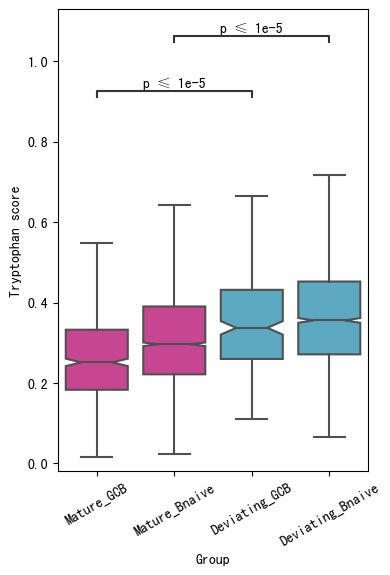

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

df = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure4/1.data//Kegg_addmodulescore.txt', index_col=0, sep='\t')

dic_color = {'Mature_GCB': '#db3196', 'Mature_Bnaive': '#db3196', 'Deviating_GCB': '#4cb1d2', 'Deviating_Bnaive': '#4cb1d2'}

# scale to 0-1
cur_v = df['Tryptophan metabolism'].values
cur_v_scaled = (cur_v - cur_v.min()) / (cur_v.max() - cur_v.min())
df['plot'] = cur_v_scaled

df = df[df['TLS_maturity'] != 'Conforming']
df['Group'] = df['TLS_maturity'].str.cat(df['CellSubType'], sep='_')

plt.figure(figsize=(4, 6))
ax = sns.boxplot(df, x='Group', y='plot', order=['Mature_GCB', 'Mature_Bnaive', 'Deviating_GCB', 'Deviating_Bnaive'], notch=True, showfliers = False, palette = dic_color)
add_stat_annotation(ax, x="Group", y='plot', data=df, order=['Mature_GCB', 'Mature_Bnaive', 'Deviating_GCB', 'Deviating_Bnaive'], 
                    box_pairs=[('Mature_GCB', 'Deviating_GCB'), ('Mature_Bnaive', 'Deviating_Bnaive')], test='Mann-Whitney',text_format="simple")
plt.legend([],[], frameon=False)
plt.ylabel('Tryptophan score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()